<a class="reference external" href="https://jupyter.designsafe-ci.org/hub/user-redirect/lab/tree/CommunityData/Training/Computational-Workflows-on-DesignSafe/Jupyter_Notebooks/Jupyter_Notebooks_TapisAppsOpenSees/tapis_submitJob_DSapp_OpenSees_Detailed.ipynb" target="_blank">
<img alt="Try on DesignSafe" src="https://raw.githubusercontent.com/DesignSafe-Training/pinn/main/DesignSafe-Badge.svg" /></a>

# Step-by-Step OpenSees App
***Step-by-Step Detailed Submit an OpenSees Tapis App***

by Silvia Mazzoni, DesignSafe, 2025

This notebook serves as a template for submitting the following DesignSafe OpenSees Apps:
* openSees-express
* openSees-mp-s3
* opensees-sp-s3

**We are using previously-defined python function to streamline the process.**

In [1]:
import os,sys
PathOpsUtils = os.path.expanduser('~/CommunityData/Training/Computational-Workflows-on-DesignSafe/OpsUtils')
if not PathOpsUtils in sys.path: sys.path.append(PathOpsUtils)
from OpsUtils import OpsUtils

## Connect to Tapis

In [2]:
t=OpsUtils.connect_tapis()

 -- Checking Tapis token --
 Token loaded from file. Token is still valid!
 Token expires at: 2025-09-10T07:14:42+00:00
 Token expires in: 2:05:58.887582
-- LOG IN SUCCESSFUL! --


In [3]:
print('QUEUE INFO')
OpsUtils.get_system_queues(t,system_id="stampede3",display=True);

QUEUE INFO


name,icx,skx,skx-dev,pvc,spr,nvdimm,h100
description,"icx (CPU, standard compute)","skx (CPU, recommended standard compute)","skx-dev (CPU, 2 hour max, 1 job max, for testing)","pvc (GPU, Intel no CUDA)","spr (CPU, high memory bandwidth)","nvdimm (CPU, large memory)",None
hpcQueueName,icx,skx,skx-dev,pvc,spr,nvdimm,h100
maxJobs,-1,-1,-1,-1,-1,-1,-1
maxJobsPerUser,20,60,3,4,36,3,4
minNodeCount,1,1,1,1,1,1,1
maxNodeCount,32,256,16,4,32,1,4
minCoresPerNode,1,1,1,1,1,1,1
maxCoresPerNode,80,48,48,96,112,80,96
minMemoryMB,1,1,1,1,1,1,1
maxMemoryMB,256000,192000,192000,128000,128000,4000000,1000000


---
## App User Input

### Initialize

In [4]:
# initalize
tapisInput = {}
tapisInput["name"] = 'OpenSeesMPsubmit'

### App Parameters

In [5]:
tapisInput["appId"] = "opensees-mp-s3" # options: "opensees-express", "opensees-mp-s3", "opensees-2p-s3"
tapisInput["appVersion"] = "latest" # always use latest in this Notebook Template

---
### Get app schema -- input

In [6]:
thisAppData_MP = OpsUtils.get_tapis_app_schema(t,tapisInput["appId"],version='latest')

In [7]:
OpsUtils.display_tapis_app_schema(thisAppData_MP)

########################################
########### TAPIS-APP SCHEMA ###########
########################################
######## appID: opensees-mp-s3
######## version: latest
########################################
{
  sharedAppCtx: "wma_prtl"
  isPublic: True
  tenant: "designsafe"
  id: "opensees-mp-s3"
  version: "latest"
  description: "Runs all the processors in parallel. Requires understanding of parallel processing and the capabilities to write parallel scripts."
  owner: "wma_prtl"
  enabled: True
  versionEnabled: True
  locked: False
  runtime: "ZIP"
  runtimeVersion: None
  runtimeOptions: None
  containerImage: "tapis://cloud.data/corral/tacc/aci/CEP/applications/v3/opensees/latest/OpenSees/opensees.zip"
  jobType: "BATCH"
  maxJobs: 2147483647
  maxJobsPerUser: 2147483647
  strictFileInputs: True
  uuid: "1410a584-0c5e-4e47-b3b0-3a7bea0e1187"
  deleted: False
  created: "2025-02-20T18:01:49.005183Z"
  updated: "2025-08-28T20:17:39.426067Z"
  sharedWithUsers: []
  tags

### TACC-Job Parameters
https://docs.tacc.utexas.edu/hpc/stampede3/

In [8]:
tapisInput["maxMinutes"] = 6

# OpenSees-mp-s3 and OpenSees-xp-s3 only:
if tapisInput["appId"] in ["opensees-mp-s3","opensees-sp-s3"]:
    tapisInput["execSystemId"] = "stampede3" # the app runs on stampede only
    tapisInput["execSystemLogicalQueue"] = "skx-dev" # "skx", "skx-dev"... for info: use the command 'OpsUtils.get_system_queues(t,system_id="stampede3",display=True);'
    tapisInput["nodeCount"] = 1 # limits set by which compute nodes you use
    tapisInput["coresPerNode"] = 48 # limits set by which compute nodes you use
    tapisInput["allocation"] = "DS-HPC1"


---
###  INPUT Files Parameters

#### Storage SystemTapis & Tapis Base Path in URI format
this is the very first part of your path, just above your home folder.

Options: 
* **CommunityData**
* **Published**

The following options are user or project-dependent, and require unique path input.


The following option requires additional **user-dependent** input:
* **MyData**

The following option requires additional **user- and system- dependent** input:
* **Work**

The following option requires additional **project-dependent** input:
* **MyProjects**

You can obtain a dependent tapis-URI path by performing the first step of submitting an OpenSeesMP job at the app portal: https://www.designsafe-ci.org/workspace/opensees-mp-s3

In [9]:
tapisInput['storage_system'] = 'MyData' # options: Community,MyData,Published,MyProjects,Work/stampede3,Work/frontera,Work/ls6

### We will use a utility function to get the Tapis-compatible URI:
**get_uer_path_tapis_uri()**: Discover and cache user-specific Tapis base URIs for DesignSafe storage systems, then return either the entire dictionary or a single base URI.

In [10]:
OpsUtils.show_text_file_in_accordion(PathOpsUtils,['get_user_path_tapis_uri.py'])

In [11]:
tapisInput['storage_system_baseURL'] = OpsUtils.get_user_path_tapis_uri(t,tapisInput['storage_system'])

print('storage_system_baseURL:',tapisInput['storage_system_baseURL'])

found paths file: /home/jupyter/MyData/.tapis_user_paths.json
storage_system_baseURL: tapis://designsafe.storage.default/silvia


#### File Paths
The **input_folder**  is the directory of your input file.
* **DO NOT INCLUDE** the storage system, such as MyData, etc. 
* Start from the first folder within your storage-system folder.

The **Main Script** is the full name of the file that will be submitted to OpenSees. Yes you need to include the extension.

In [12]:
tapisInput['input_folder'] = '_ToCommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Examples_OpenSees/BasicExamples'
tapisInput['Main Script'] = 'Ex1a_verymany.Canti2D.Push.mp.tcl'

---
### OUTPUT-Files Parameters
Where would you like your files to be archived once the job is finished?

Options: **MyData** and **Work** 

In both cases you will find them in the **tapis-jobs-archive** folder in either MyData or Work/stampede3. 

Remember, you cannot write to Projects nor CommunityData.

In [13]:
tapisInput['archive_system']='Work' # Options: MyData or Work

---
### Review User Input

In [14]:
display(tapisInput)

{'name': 'OpenSeesMPsubmit',
 'appId': 'opensees-mp-s3',
 'appVersion': 'latest',
 'maxMinutes': 6,
 'execSystemId': 'stampede3',
 'execSystemLogicalQueue': 'skx-dev',
 'nodeCount': 1,
 'coresPerNode': 48,
 'allocation': 'DS-HPC1',
 'storage_system': 'MyData',
 'storage_system_baseURL': 'tapis://designsafe.storage.default/silvia',
 'input_folder': '_ToCommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Examples_OpenSees/BasicExamples',
 'Main Script': 'Ex1a_verymany.Canti2D.Push.mp.tcl',
 'archive_system': 'Work'}

#### Get interpreted Tapis-App Input (Optional)
this is what will be sent as input (just informational here, and good to check input)

In [15]:
OpsUtils.show_text_file_in_accordion(PathOpsUtils,['get_tapis_job_description.py'])

In [16]:
OpsUtils.get_tapis_job_description(t,tapisInput)

input directory URI: tapis://designsafe.storage.default/silvia/_ToCommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Examples_OpenSees/BasicExamples
HEREkey appArgs
app_Dict {'arg': 'OpenSeesMP', 'name': 'mainProgram', 'description': None, 'inputMode': 'FIXED', 'notes': 
isHidden: True}
app_Dict {'arg': None, 'name': 'Main Script', 'description': "The filename only of the OpenSees TCL script to execute. This file should reside in the Input Directory specified. To use with test input, use 'freeFieldEffective.tcl'", 'inputMode': 'REQUIRED', 'notes': 
inputType: fileInput}
HEREkey envVariables


{'name': 'OpenSeesMPsubmit',
 'execSystemId': 'stampede3',
 'execSystemLogicalQueue': 'skx-dev',
 'maxMinutes': 6,
 'nodeCount': 1,
 'coresPerNode': 48,
 'appId': 'opensees-mp-s3',
 'appVersion': 'latest',
 'fileInputs': [{'name': 'Input Directory',
   'sourceUrl': 'tapis://designsafe.storage.default/silvia/_ToCommunityData/OpenSees/TrainingMaterial/training-OpenSees-on-DesignSafe/Examples_OpenSees/BasicExamples'}],
 'parameterSet': {'appArgs': [{'name': 'Main Script',
    'arg': 'Ex1a_verymany.Canti2D.Push.mp.tcl'}],
  'envVariables': [],
  'schedulerOptions': [{'name': 'TACC Allocation', 'arg': '-A DS-HPC1'}]},
 'archiveSystemId': 'stampede3',
 'archiveSystemDir': 'HOST_EVAL($WORK)/tapis-jobs-archive/${JobCreateDate}/${JobName}-${JobUUID}'}

### GO!

In [17]:
OpsUtils.show_text_file_in_accordion(PathOpsUtils,['run_tapis_job.py'])

In [18]:
# Here is a function that combines all the steps involved in submitting a job to Tapis.
jobReturns = OpsUtils.run_tapis_job(t,tapisInput)

Accordion(children=(Output(),), selected_index=0, titles=('',))

Are you sure you want to submit the job? (press n to cancel, any key to confirm):  
Do you want to monitor the job in real-time? (press n to cancel, any key to confirm):  


In [19]:
jobUuid = jobReturns['jobUuid']
print('jobUuid:',jobUuid)
print('jobReturns',jobReturns.keys())

jobUuid: b280beaf-854e-4264-9b84-49f1d6085a12-007
jobReturns dict_keys(['jobUuid', 'submitted_job', 'job_start_time', 'runJobStatus', 'job_description', 'JobHistory', 'JobMetadata', 'JobFiledata', 'JobStatusData'])


<hr>

### ONCE THE JOB HAS COMPLETED....

<hr>

## Get detailed Job Status, Metadata, History, Stage Durations, and Files List

In [20]:
JobStatus = OpsUtils.get_tapis_job_status(t, jobUuid)

Accordion(children=(Output(),), selected_index=0, titles=('Job STATUS   (b280beaf-854e-4264-9b84-49f1d6085a12-…

In [21]:
JobMetadata = OpsUtils.get_tapis_job_metadata(t, jobUuid)

Accordion(children=(Output(),), selected_index=0, titles=('Job Metadata   (b280beaf-854e-4264-9b84-49f1d6085a1…

In [22]:
JobHistory = OpsUtils.get_tapis_job_history_data(t, jobUuid,print_out=True)

Accordion(children=(Output(),), selected_index=0, titles=('Job History Data   (b280beaf-854e-4264-9b84-49f1d60…

In [23]:
AllFilesDict = OpsUtils.get_tapis_job_all_files(t, jobUuid, displayIt=10, target_dir=False)

Accordion(children=(Output(),), selected_index=0, titles=('Job Filedata   (b280beaf-854e-4264-9b84-49f1d6085a1…

## Visualize Data
this is the same process as what we had done when we presented the web-portal submit

---
#### get base path for output data from posted path:
Different systems in DesignSafe have different root paths

In [24]:
basePath = JobMetadata['archiveSystemDir_out']
print('basePath',basePath)

basePath /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory


#### directory contents

In [25]:
if os.path.exists(basePath):
    print(os.listdir(basePath))
else:
    print('path does not exist')

['Ex1a_verymany.Canti2D.Push.mp.tcl', '.ipynb_checkpoints', 'Ex1a.Canti2D.Push.tcl', 'Ex1a.Canti2D.Push.mpi4py.py', 'LcolList.out', 'Ex1a.Canti2D.Push.mp.tcl', 'Ex1a.Canti2D.Push.py', 'simpleSP.tcl', 'DataTCLmp', 'Ex1a.Canti2D.Push.mpi.py', 'Ex1a_many.Canti2D.Push.mp.tcl']


---
#### Plot some analysis results
for any of the above analyses

In [26]:
import matplotlib.pyplot as plt
import numpy

In [27]:
#pick any case
print('basePath:',basePath)
dataDir = f'{basePath}/DataTCLmp'; # know this from my input script, or see directory contents
print('dataDir:',dataDir)
if os.path.exists(dataDir):
    print('dataDir exists!!!')
else:
    print('dataDir DOES NOT EXIST! -- it may just need time....you may just need to re-run this and the subsequent cells')

basePath: /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory
dataDir: /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory/DataTCLmp
dataDir exists!!!


#### List files in folder for a specific case, also using a wildcard
You could use the following command, but it is not 100% reliable nor safe. it also doesn't return the list.
*os.system(f'ls {dataDir}/*Lcol{Lcol}.out')*

In [28]:
Lcol = 100.0

In [29]:
import glob
# Build the wildcard pattern
pattern = os.path.join(dataDir, f"*Lcol{Lcol}.out")
# Get matching files as a Python list
files = glob.glob(pattern)
for f in files:
    print(f)

/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory/DataTCLmp/DBase_Lcol100.0.out
/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory/DataTCLmp/RBase_Lcol100.0.out
/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory/DataTCLmp/DFree_Lcol100.0.out
/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory/DataTCLmp/DCol_Lcol100.0.out
/home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory/DataTCLmp/FCol_Lcol100.0.out


fname3: /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory/DataTCLmp/DFree_Lcol100.0.out


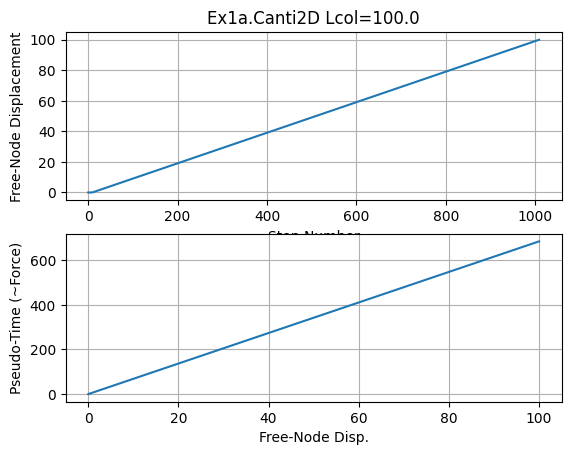

plot saved to /home/jupyter/Work/stampede3/tapis-jobs-archive/2025-09-10Z/OpenSeesMPsubmit-b280beaf-854e-4264-9b84-49f1d6085a12-007/inputDirectory/DataTCLmp/Response_Lcol100.0.jpg
End of Run: Ex1a.Canti2D.Push.py.ipynb


In [30]:
plt.close('all')
fname3o = f'DFree_Lcol{Lcol}.out'
fname3 = f'{dataDir}/{fname3o}'
print('fname3:',fname3)
dataDFree = numpy.loadtxt(fname3)
plt.subplot(211)
plt.title(f'Ex1a.Canti2D Lcol={Lcol}')
plt.grid(True)
plt.plot(dataDFree[:,1])
plt.xlabel('Step Number')
plt.ylabel('Free-Node Displacement')
plt.subplot(212)
plt.grid(True)
plt.plot(dataDFree[:,1],dataDFree[:,0])
plt.xlabel('Free-Node Disp.')
plt.ylabel('Pseudo-Time (~Force)')
plt.savefig(f'{dataDir}/Response.jpg')
plt.show()
print(f'plot saved to {dataDir}/Response_Lcol{Lcol}.jpg')
print('End of Run: Ex1a.Canti2D.Push.py.ipynb')


In [31]:
print('Done!')

Done!
